In [ ]:
!pip install yfinance
!pip install ta

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load Data

In [ ]:
import yfinance as yf
import datetime

# Define the stock ticker symbol and the time period
## DO NOT CHANE THESE VALUES!
stock_symbol = 'RELIANCE.NS'
start_date = '2014-10-04'
end_date = '2024-10-04'

# Fetch the historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

import plotly
import plotly.graph_objs as go

# Create a line plot of the stock's closing price-
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price')])

# Set the layout for the plot
fig.update_layout(title=f'Stock Price of {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')

# Display the plot
fig.show()

[*********************100%***********************]  1 of 1 completed


Technical Index

In [ ]:
import ta

# RSI
stock_data['RSI'] = ta.momentum.rsi(stock_data['Close'], window=14, fillna=True)

# SMA
stock_data['SMA'] = ta.trend.sma_indicator(stock_data['Close'], window=12, fillna=True)

# OBV
stock_data['OBV'] = ta.volume.on_balance_volume(stock_data['Close'], stock_data['Volume'], fillna=True)

# MACD related
# create an macd object
macd = ta.trend.MACD(stock_data['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True)

# MACD line
stock_data['MACD'] = macd.macd()

# MACD signal line
stock_data['MACD_signal'] = macd.macd_signal()

# MACD histogram/diff
stock_data['MACD_diff'] = macd.macd_diff()

# Calculate daily price difference
stock_data['Price_diff'] = stock_data['Close'].diff().fillna(0)

stock_data.head()

ValueError: Data must be 1-dimensional, got ndarray of shape (2464, 1) instead

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2014-10-07 00:00:00+00:00 to 2024-10-03 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  2464 non-null   float64
 1   (Close, RELIANCE.NS)      2464 non-null   float64
 2   (High, RELIANCE.NS)       2464 non-null   float64
 3   (Low, RELIANCE.NS)        2464 non-null   float64
 4   (Open, RELIANCE.NS)       2464 non-null   float64
 5   (Volume, RELIANCE.NS)     2464 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.8 KB


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(stock_data, test_size=0.3, shuffle=False)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2021-10-05 00:00:00+00:00 to 2024-10-03 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  740 non-null    float64
 1   (Close, RELIANCE.NS)      740 non-null    float64
 2   (High, RELIANCE.NS)       740 non-null    float64
 3   (Low, RELIANCE.NS)        740 non-null    float64
 4   (Open, RELIANCE.NS)       740 non-null    float64
 5   (Volume, RELIANCE.NS)     740 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.5 KB


In [ ]:
sequence_length = df_train['2014-10-04':'2021-10-04'].shape[0]
sequence_length

1724

In [ ]:
df_train.to_csv('RELIANCE.NS_stock.csv', index=False)

EDA

In [ ]:
df_train.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1.724000e+03
mean,965.083098,988.141191,1000.396557,976.926634,989.030594,1.027486e+07
std,542.808417,544.233623,551.412679,537.855724,545.178332,7.514311e+06
min,348.367126,370.647614,373.824921,364.110138,373.322052,0.000000e+00
25%,445.870468,464.801025,470.069870,460.783691,465.629646,5.912983e+06
50%,835.833344,861.598602,868.616089,852.249512,861.141388,8.017545e+06
75%,1290.580322,1313.644318,1336.845825,1305.987122,1321.256531,1.174168e+07
max,2335.448486,2359.325684,2376.585693,2341.696289,2372.109131,7.134168e+07


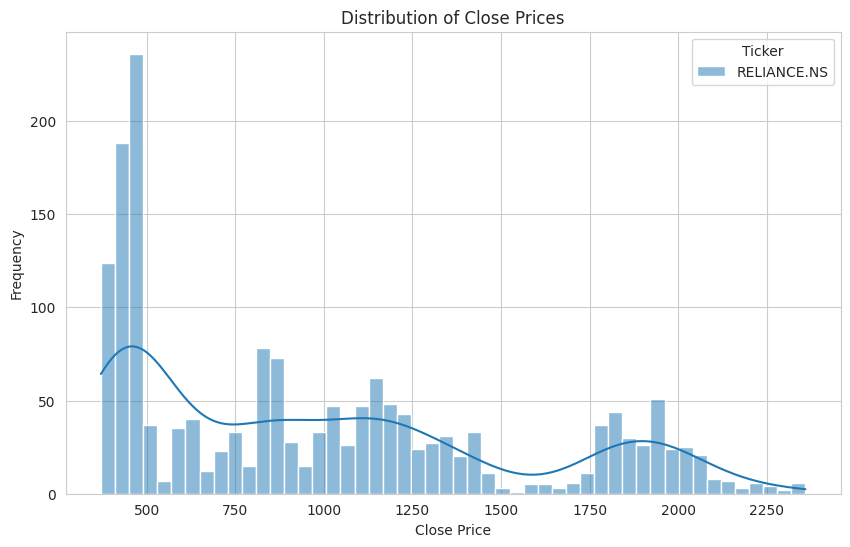

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Plot the distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# Calculate the median and variance of 'Close' prices
close_std = df_train['Close'].std()
close_std

,0
Ticker,
RELIANCE.NS,544.233623


Correlation Analysis

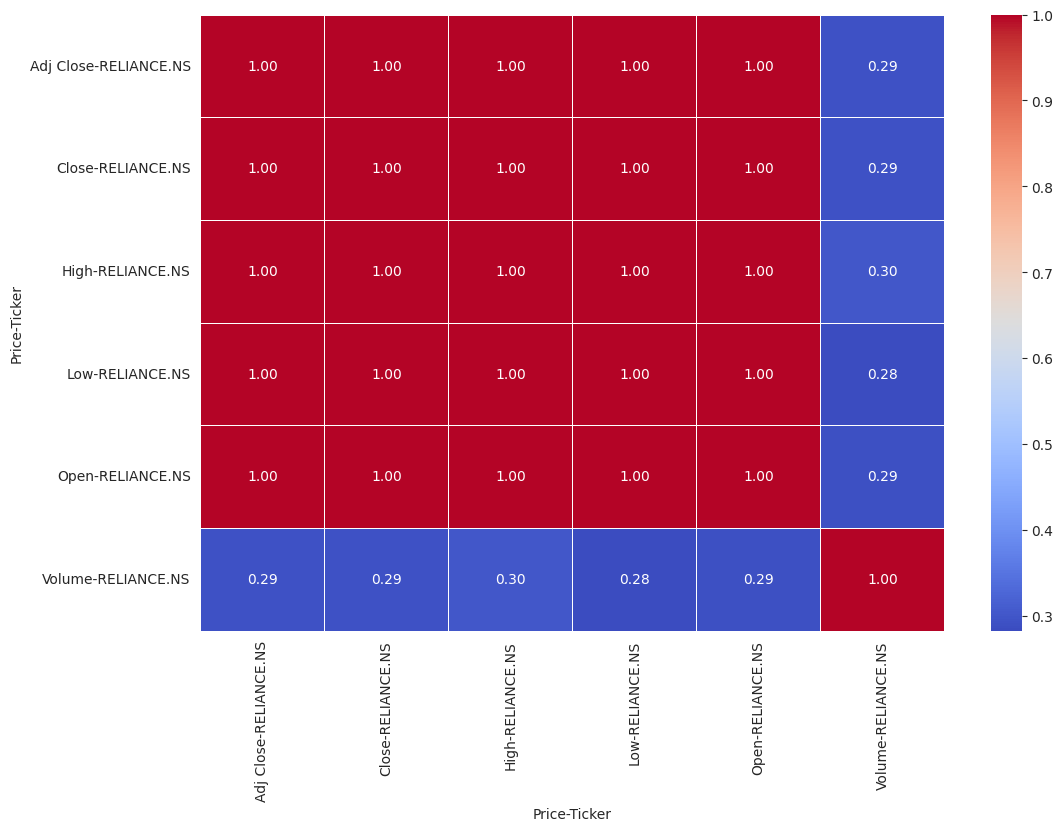

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = [col for col in df_train.columns if col not in ['Close']]
df_train_scaled = scaler.fit_transform(df_train[features_to_scale])
df_test_scaled = scaler.transform(df_test[features_to_scale])

In [ ]:
df_train.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2014-10-07 00:00:00+00:00,397.952728,423.404633,427.404816,422.170258,423.907501,6202094
2014-10-08 00:00:00+00:00,402.485901,428.227722,430.422119,421.118805,421.118805,4913891
2014-10-09 00:00:00+00:00,410.198792,436.433868,437.622498,428.913483,428.913483,5582335
2014-10-10 00:00:00+00:00,412.776855,439.176849,442.994202,427.953430,432.936554,7732828
2014-10-13 00:00:00+00:00,411.595215,437.919647,441.051239,433.416565,439.702606,6940932


In [ ]:
import pandas as pd

df_train_scaled = pd.DataFrame(df_train_scaled, columns=features_to_scale, index=df_train.index)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=features_to_scale, index=df_test.index)

df_train_scaled['Close'] = df_train['Close']
df_test_scaled['Close'] = df_test['Close']

df_train_scaled.head()

,Open,High,Low,Adj Close,Volume,RSI,SMA,OBV,MACD,MACD_signal,MACD_diff,Price_diff,Close
Date,,,,,,,,,,,,,
2014-10-07,-1.036885,-1.039436,-1.031722,-1.045111,-0.542158,3.773177,-1.036815,-1.272582,-0.284717,-0.296589,-0.021507,-0.053448,423.404633
2014-10-08,-1.042001,-1.033962,-1.033677,-1.036757,-0.713641,3.773177,-1.032340,-1.262950,-0.269313,-0.293307,0.020998,0.176119,428.227722
2014-10-09,-1.027700,-1.020900,-1.019181,-1.022544,-0.624659,3.773177,-1.025772,-1.252006,-0.231209,-0.282566,0.117634,0.337144,436.433868
2014-10-10,-1.020318,-1.011156,-1.020966,-1.017793,-0.338390,3.773177,-1.021215,-1.236847,-0.193204,-0.265878,0.194669,0.077111,439.176849
2014-10-13,-1.007904,-1.014680,-1.010806,-1.019970,-0.443806,3.074031,-1.018948,-1.250454,-0.168487,-0.247262,0.219634,-0.113288,437.919647


Deep Reinforcement Learning (Implementing DDQN)

Change from DQM to DDQN is to implement 2 different Q-values in the agent (action - main Q-value) and evaluation (target Q-value)

Environment:

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, initial_balance=50000, loss_limit=-4000, window=70):
        super().__init__()
        self.df = df
        self.initial_balance = initial_balance
        self.loss_limit = loss_limit
        self.window = window  # historical price window
        self.action_space = spaces.Discrete(3)  # 0: Hold, 1: Buy 1 stock, 2: Sell all

    # Reset the environment to the initial state
    def reset(self):
        self.current_step = self.window
        self.done = False
        self.total_profit = 0
        self.balance = self.initial_balance # available balance
        self.positions = []  # store positions
        self.history = self.df.iloc[self.current_step-self.window:self.current_step].values # initial history
        return self.get_observation()  # get_observation for the initial state

    def get_observation(self):
        stock_info = self.history
        extra_info = np.repeat([[self.total_profit, self.balance, sum(self.positions)]], self.window, axis=0)
        return np.concatenate([stock_info, extra_info], axis=1) # Concatenate along the features axis

    # Get quintuple components
    def step(self, action):

        self.current_price = self.df.iloc[self.current_step-1]['Close']
        reward = 0  # Initialize reward

        if action == 1:  # buy
            self.balance -= self.current_price # adjust balance
            self.positions.append(self.current_price) # buy one stock at current price

        elif action == 2:  # sell
            if self.positions:
                sold_amount = sum(self.positions)
                gains = self.current_price*len(self.positions) - sold_amount
                self.balance += self.current_price*len(self.positions) # adjust balance
                self.total_profit += gains
                reward = gains
                self.positions = [] # clear positions
            else:
                reward = -10  # negative reward for invalid sell with no stocks

        self.current_step += 1
        # Check if the episode is done
        if self.total_profit <= self.loss_limit or self.current_step >= self.df.shape[0]:
            self.done = True

        self.history = np.array(self.df.iloc[self.current_step-self.window:self.current_step]) # update history
        next_state = self.get_observation() # Get observation of the next step

        return next_state, reward, self.done, {'Trade price': self.current_price , 'Total profit': self.total_profit, 'Available balance': self.balance, 'Position value': sum(self.positions)}

    # Render the environment
    def render(self, mode='human', close=False):
        action = self.action_space.sample() # choose a random action
        next_state, reward, done, info = self.step(action)
        print(f'Step:{self.current_step}')
        print(f'Next State: {next_state}')
        print(f"Action:{action}, Reward:{reward}, Done:{done}, Info:{info}")

In [ ]:
# keep only first 5 rows of df_train
data = df_train_scaled.iloc[:15][['Close', 'RSI', 'SMA', 'MACD']]
data

,Close,RSI,SMA,MACD
Date,,,,
2014-10-07,423.404633,3.773177,-1.036815,-0.284717
2014-10-08,428.227722,3.773177,-1.032340,-0.269313
2014-10-09,436.433868,3.773177,-1.025772,-0.231209
2014-10-10,439.176849,3.773177,-1.021215,-0.193204
2014-10-13,437.919647,3.074031,-1.018948,-0.168487
2014-10-14,439.451172,3.144382,-1.016963,-0.145554
2014-10-15,439.451172,3.144382,-1.015545,-0.129173
2014-10-16,425.621887,-0.739318,-1.017689,-0.162282
2014-10-17,428.776337,-0.234229,-1.018707,-0.179542


Testing Environmnet

In [ ]:
# Create the environment
env = StockTradingEnv(data, window=3)

# Check initial state
initial_state = env.reset()
initial_state

array([[ 4.23404633e+02,  3.77317703e+00, -1.03681506e+00,
        -2.84717270e-01,  0.00000000e+00,  5.00000000e+04,
         0.00000000e+00],
       [ 4.28227722e+02,  3.77317703e+00, -1.03233979e+00,
        -2.69312528e-01,  0.00000000e+00,  5.00000000e+04,
         0.00000000e+00],
       [ 4.36433868e+02,  3.77317703e+00, -1.02577178e+00,
        -2.31208759e-01,  0.00000000e+00,  5.00000000e+04,
         0.00000000e+00]])

In [ ]:
# Test the environment
observation = env.reset()
for i in range(12):
    env.render()
    print()

# Close the environment
env.close()

Step:4
Next State: [[ 4.28227722e+02  3.77317703e+00 -1.03233979e+00 -2.69312528e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 4.36433868e+02  3.77317703e+00 -1.02577178e+00 -2.31208759e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 4.39176849e+02  3.77317703e+00 -1.02121519e+00 -1.93204198e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]]
Action:2, Reward:-10, Done:False, Info:{'Trade price': 436.4338684082031, 'Total profit': 0, 'Available balance': 50000, 'Position value': 0}

Step:5
Next State: [[ 4.36433868e+02  3.77317703e+00 -1.02577178e+00 -2.31208759e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 4.39176849e+02  3.77317703e+00 -1.02121519e+00 -1.93204198e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 4.37919647e+02  3.07403107e+00 -1.01894786e+00 -1.68486879e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]]
Action:2, Reward:-10, Done:False, Info:{'Trade price': 439.1768493652344, 'Total profit': 0, 'Available balance': 5

Model (Check once whether this is suitable for ddqn)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the DQN model with LSTM
class DQN_lstm(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(DQN_lstm, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)  # Final fully connected layer

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)  # Initial hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_dim)
        out = out[:, -1, :]  # Get outputs for the last time step
        return self.fc(out)

Replay Memory

In [ ]:
# Define the Replay Memory
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity # maximum
        self.memory = deque(maxlen=capacity) # replace the oldest transition, represented in the form of quintuple, with the latest transit when exceeds the maximum capacity

    def push(self, quintuple): # push a new transition to the memory
        self.memory.append(quintuple)

    def sample(self, batch_size): # random sample transitions of batch_size from the memory and use for training
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory) # return the current number of transitions in the memory

Agent

In [ ]:
class DDQNAgent:
    def __init__(self, state_size, action_size, policy_net, target_net, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=200):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = epsilon_start  # Epsilon-greedy policy to ensure exploration
        self.epsilon_min = epsilon_end  # Minimum epsilon value
        self.epsilon_decay = epsilon_decay  # Control decay rate
        self.policy_net = policy_net  # Main Q-network
        self.target_net = target_net  # Target Q-network
        self.target_net.eval()  # Target network is only used for evaluation

    def act(self, state, test=False):
        # Epsilon-greedy action selection
        if not test and random.random() <= self.epsilon:
            return random.randrange(self.action_size)  # Random action (exploration)
        else:
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            with torch.no_grad():
                action_values = self.policy_net(state)  # Use policy_net for action selection
            return np.argmax(action_values.cpu().detach().numpy())  # Choose the best action

    def update_epsilon(self):
        # Decay epsilon after each episode
        self.epsilon = max(self.epsilon_min, self.epsilon * (1 - 1/self.epsilon_decay))

    def update_target_network(self):
        # Update the target_net to match the policy_net
        self.target_net.load_state_dict(self.policy_net.state_dict())

Trainer

In [ ]:
class DDQNTrainer:
    def __init__(self, agent, memory, batch_size=128, gamma=0.99, lr=1e-3):
        self.agent = agent
        self.memory = memory
        self.batch_size = batch_size
        self.gamma = gamma  # Discount factor for future rewards
        self.optimizer = optim.Adam(agent.policy_net.parameters(), lr=lr)  # Use policy_net for optimization

    def train_step(self):
        # Sample a minibatch from memory
        minibatch = self.memory.sample(self.batch_size)
        states, actions, rewards, next_states, dones = zip(*minibatch)

        # Convert minibatch to tensors
        states = torch.stack([torch.FloatTensor(s) for s in states]).to(device)
        next_states = torch.stack([torch.FloatTensor(s) for s in next_states]).to(device)
        actions = torch.LongTensor(np.array(actions)).view(-1, 1).to(device)
        rewards = torch.FloatTensor(np.array(rewards)).to(device)
        dones = torch.FloatTensor(np.array(dones)).to(device)

        # Compute Q_expected using the policy network
        Q_expected = self.agent.policy_net(states).gather(1, actions).squeeze()

        # Compute Q_target using DDQN approach
        with torch.no_grad():
            # Use policy_net to select the best action in the next state
            next_actions = self.agent.policy_net(next_states).argmax(dim=1, keepdim=True)

            # Use target_net to compute the Q-value of the selected action
            Q_next = self.agent.target_net(next_states).gather(1, next_actions).squeeze()
            Q_target = rewards + (self.gamma * Q_next * (1 - dones))

        # Compute the loss between Q_expected and Q_target
        loss = nn.MSELoss()(Q_expected, Q_target)

        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()

LSTM

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
window_size = 20
state_size = df_train_scaled.shape[1] + 3
action_size = env.action_space.n

# Initialize environment
env = StockTradingEnv(df_train_scaled, window=window_size)

# Initialize the model
lstm_policy = DQN_lstm(input_dim=state_size, hidden_dim=64, output_dim=action_size).to(device)
lstm_target = DQN_lstm(input_dim=state_size, hidden_dim=64, output_dim=action_size).to(device)

# Initialize agent
agent = DDQNAgent(state_size=state_size, action_size=action_size, policy_net=lstm_policy, target_net=lstm_target)

# Initialize replay memory
memory = ReplayMemory(capacity=10000)

# Initialize trainer
trainer = DDQNTrainer(agent, memory)

episode_reward = []
episode_loss = []
num_episodes = 100
initial_memory = 7000

# Fill up the memory
while len(memory) < initial_memory:
    state = env.reset()
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        memory.push((state, action, reward, next_state, done))
        state = next_state

for episode in range(num_episodes):
    lstm_policy.train()  # Train policy network
    state = env.reset()
    total_reward = 0
    total_loss = []
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        memory.push((state, action, reward, next_state, done))

        # Train the model and get the loss
        loss = trainer.train_step()
        total_loss.append(loss)

        # Update epsilon for exploration
        agent.update_epsilon()

        state = next_state
        total_reward += reward

    # Update target network at fixed intervals, e.g., every 10 episodes
    if (episode + 1) % 10 == 0:
        agent.update_target_network()  # Update target network

    episode_reward.append(total_reward)
    episode_loss.append(np.mean(total_loss))
    print(f"Episode: {episode + 1}, Memory: {len(memory)}, Train Loss: {np.mean(total_loss):.4f}, Train Reward: {total_reward:.4f}, Total Profit: {info['Total profit']}")

Episode: 1, Memory: 10000, Train Loss: 7622.2351, Train Reward: 18177.4178, Total Profit: 21987.41781616211
Episode: 2, Memory: 10000, Train Loss: 14134.3909, Train Reward: -4874.6471, Total Profit: 3955.3529357910156
Episode: 3, Memory: 10000, Train Loss: 14740.1989, Train Reward: 1913.8878, Total Profit: 1933.8878479003906
Episode: 4, Memory: 10000, Train Loss: 16549.7690, Train Reward: 1311.0029, Total Profit: 1321.0028991699219
Episode: 5, Memory: 10000, Train Loss: 16583.3866, Train Reward: 290.9102, Total Profit: 310.91021728515625
Episode: 6, Memory: 10000, Train Loss: 17456.8175, Train Reward: 983.7526, Total Profit: 1003.7525939941406
Episode: 7, Memory: 10000, Train Loss: 8494.6807, Train Reward: 284.4695, Total Profit: 344.469482421875
Episode: 8, Memory: 10000, Train Loss: 659.8561, Train Reward: 433.3385, Total Profit: 473.3384704589844
Episode: 9, Memory: 10000, Train Loss: 222.5441, Train Reward: 1567.4395, Total Profit: 1567.439453125
Episode: 10, Memory: 10000, Train L

In [ ]:
episodes = list(range(1, num_episodes + 1))
plt.figure(figsize=(14, 5))
plt.plot(episodes, episode_loss, linestyle='-')
plt.xlabel('Episodes', size=16)
plt.ylabel('Loss', size = 16)
plt.grid(True)
plt.xticks(range(0, num_episodes + 1, 10))
plt.show()

In [ ]:
episodes = list(range(1, num_episodes + 1))
plt.figure(figsize=(14, 5))
plt.plot(episodes, episode_reward, linestyle='-')
plt.xlabel('Episodes', size=16)
plt.ylabel('Total Reward', size = 16)
plt.grid(True)
plt.xticks(range(0, num_episodes + 1, 10))
plt.axhline(0, color='red', alpha=0.4)
plt.show()

In [ ]:
# Set the policy network to evaluation mode
lstm_policy.eval()  # Using policy network for evaluation
env_test = StockTradingEnv(df_test_scaled, window=window_size)
state = env_test.reset()
total_reward = 0
done = False

while not done:
    action = agent.act(state, test=True)  # Only take the optimal action during testing
    next_state, reward, done, info = env_test.step(action)
    total_reward += reward
    state = next_state

print(f"Test reward: {total_reward:.4f}, Total profit: {info['Total profit']}")